In [477]:
import pandas as pd
from scipy.io.arff import loadarff
# from matplot import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV



In [416]:
raw_data = loadarff('dataset.arff')
df = pd.DataFrame(raw_data[0])
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'


In [417]:
df.rename(columns={'V1': 'age', 'V2': 'job', 'V3': 'marital', 'V4': 'education', 'V5': 'default_in_credit', 'V6': 'balance', 'V7': 'housing_loan', 'V8': 'personal_loan', 'V9': 'contact', 'V10': 'last_day_contact_of_month', 'V11': 'last_month_contact_of_year', 'V12': 'contact_duration', 'V13': 'number_of_contacts_performed_during_campaign', 'V14': 'last_contact_of_previous_campaign', 'V15': 'number_of_contact_of_previous_campaign', 'V16': 'outcome_of_previous_campaign', 'Class': 'has_subscribed'}, inplace = True)
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,b'management',b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,b'management',b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,b'entrepreneur',b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,b'retired',b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,b'technician',b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


In [418]:
df_job = pd.get_dummies(df['job'])
df_job.head(5)

,b'admin.',b'blue-collar',b'entrepreneur',b'housemaid',b'management',b'retired',b'self-employed',b'services',b'student',b'technician',b'unemployed',b'unknown'
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [419]:
dict_job = {}
i=0
for job in df_job.columns.values:
    dict_job[job] = i
    i+=1
print(dict_job)

{b'admin.': 0, b'blue-collar': 1, b'entrepreneur': 2, b'housemaid': 3, b'management': 4, b'retired': 5, b'self-employed': 6, b'services': 7, b'student': 8, b'technician': 9, b'unemployed': 10, b'unknown': 11}


In [420]:
for job in dict_job.keys():
    df['job'].loc[(df['job'] == job)] = dict_job[job]
    warnings.filterwarnings('ignore')

In [421]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,9,b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,2,b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,1,b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,11,b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,4,b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,4,b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,2,b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,5,b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,9,b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


In [422]:
df_marital = pd.get_dummies(df['marital'])

In [423]:
df_marital.head(10)

,b'divorced',b'married',b'single'
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
6,0,0,1
7,1,0,0
8,0,1,0
9,0,0,1


In [424]:
dict_marital = {b'single': 0, b'married': 1, b'divorced': 2}
print(dict_marital)

{b'single': 0, b'married': 1, b'divorced': 2}


In [425]:
for marital in dict_marital.keys():
    df['marital'].loc[(df['marital'] == marital)] = dict_marital[marital]
    warnings.filterwarnings('ignore')

In [426]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,9,0,b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,2,1,b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,1,1,b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,11,0,b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,4,1,b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,4,0,b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,2,2,b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,5,1,b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,9,0,b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


In [427]:
df['default_in_credit'].loc[(df['default_in_credit'] == b'no')] = 0
df['default_in_credit'].loc[(df['default_in_credit'] == b'yes')] = 1
df['housing_loan'].loc[(df['housing_loan'] == b'no')] = 0
df['housing_loan'].loc[(df['housing_loan'] == b'yes')] = 1
df['personal_loan'].loc[(df['personal_loan'] == b'no')] = 0
df['personal_loan'].loc[(df['personal_loan'] == b'yes')] = 1
df['last_contact_of_previous_campaign'].loc[(df['last_contact_of_previous_campaign'] == -1.0)] = 0

In [428]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,b'tertiary',0,2143.0,1,0,b'unknown',5.0,b'may',261.0,1.0,0.0,0.0,b'unknown',b'1'
1,44.0,9,0,b'secondary',0,29.0,1,0,b'unknown',5.0,b'may',151.0,1.0,0.0,0.0,b'unknown',b'1'
2,33.0,2,1,b'secondary',0,2.0,1,1,b'unknown',5.0,b'may',76.0,1.0,0.0,0.0,b'unknown',b'1'
3,47.0,1,1,b'unknown',0,1506.0,1,0,b'unknown',5.0,b'may',92.0,1.0,0.0,0.0,b'unknown',b'1'
4,33.0,11,0,b'unknown',0,1.0,0,0,b'unknown',5.0,b'may',198.0,1.0,0.0,0.0,b'unknown',b'1'
5,35.0,4,1,b'tertiary',0,231.0,1,0,b'unknown',5.0,b'may',139.0,1.0,0.0,0.0,b'unknown',b'1'
6,28.0,4,0,b'tertiary',0,447.0,1,1,b'unknown',5.0,b'may',217.0,1.0,0.0,0.0,b'unknown',b'1'
7,42.0,2,2,b'tertiary',1,2.0,1,0,b'unknown',5.0,b'may',380.0,1.0,0.0,0.0,b'unknown',b'1'
8,58.0,5,1,b'primary',0,121.0,1,0,b'unknown',5.0,b'may',50.0,1.0,0.0,0.0,b'unknown',b'1'
9,43.0,9,0,b'secondary',0,593.0,1,0,b'unknown',5.0,b'may',55.0,1.0,0.0,0.0,b'unknown',b'1'


In [429]:
df_education = pd.get_dummies(df['education'])
df_education.head(10)

,b'primary',b'secondary',b'tertiary',b'unknown'
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,1,0,0


In [430]:
dict_education = {b'unknown': 0, b'primary': 1, b'secondary': 2, b'tertiary': 3}
print(dict_education)

{b'unknown': 0, b'primary': 1, b'secondary': 2, b'tertiary': 3}


In [431]:
for education in dict_education.keys():
    df['education'].loc[(df['education'] == education)] = dict_education[education]
    warnings.filterwarnings('ignore')

In [432]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,b'may',261.0,1.0,0.0,0.0,b'unknown',b'1'
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,b'may',151.0,1.0,0.0,0.0,b'unknown',b'1'
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,b'may',76.0,1.0,0.0,0.0,b'unknown',b'1'
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,b'may',92.0,1.0,0.0,0.0,b'unknown',b'1'
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,b'may',198.0,1.0,0.0,0.0,b'unknown',b'1'
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,b'may',139.0,1.0,0.0,0.0,b'unknown',b'1'
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,b'may',217.0,1.0,0.0,0.0,b'unknown',b'1'
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,b'may',380.0,1.0,0.0,0.0,b'unknown',b'1'
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,b'may',50.0,1.0,0.0,0.0,b'unknown',b'1'
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,b'may',55.0,1.0,0.0,0.0,b'unknown',b'1'


In [433]:
df_outcome_previous = pd.get_dummies(df['outcome_of_previous_campaign'])
df_outcome_previous.head(10)

,b'failure',b'other',b'success',b'unknown'
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [434]:
previous_outcome_campaign_dict = {b'failure': 0, b'success': 1, b'other': 2, b'unknown': 3}
print(previous_outcome_campaign_dict)

{b'failure': 0, b'success': 1, b'other': 2, b'unknown': 3}


In [435]:
for previous_outcome in previous_outcome_campaign_dict.keys():
    df['outcome_of_previous_campaign'].loc[(df['outcome_of_previous_campaign'] == previous_outcome)] = previous_outcome_campaign_dict[previous_outcome]
    warnings.filterwarnings('ignore')

In [436]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,b'may',261.0,1.0,0.0,0.0,3,b'1'
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,b'may',151.0,1.0,0.0,0.0,3,b'1'
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,b'may',76.0,1.0,0.0,0.0,3,b'1'
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,b'may',92.0,1.0,0.0,0.0,3,b'1'
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,b'may',198.0,1.0,0.0,0.0,3,b'1'
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,b'may',139.0,1.0,0.0,0.0,3,b'1'
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,b'may',217.0,1.0,0.0,0.0,3,b'1'
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,b'may',380.0,1.0,0.0,0.0,3,b'1'
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,b'may',50.0,1.0,0.0,0.0,3,b'1'
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,b'may',55.0,1.0,0.0,0.0,3,b'1'


In [437]:
df_last_month_contact = pd.get_dummies(df['last_month_contact_of_year'])
df_last_month_contact.head(10)

,b'apr',b'aug',b'dec',b'feb',b'jan',b'jul',b'jun',b'mar',b'may',b'nov',b'oct',b'sep'
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0


In [438]:
month_dict = {b'jan': 1, b'feb': 2, b'mar': 3, b'apr': 4, b'may': 5, b'jun': 6, b'jul': 7, b'aug': 8, b'sep': 9, b'oct': 10, b'nov': 11, b'dec': 12}
print(month_dict)

{b'jan': 1, b'feb': 2, b'mar': 3, b'apr': 4, b'may': 5, b'jun': 6, b'jul': 7, b'aug': 8, b'sep': 9, b'oct': 10, b'nov': 11, b'dec': 12}


In [439]:
for month in month_dict.keys():
    df['last_month_contact_of_year'].loc[(df['last_month_contact_of_year'] == month)] = month_dict[month]
    warnings.filterwarnings('ignore')

In [440]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,5,261.0,1.0,0.0,0.0,3,b'1'
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,5,151.0,1.0,0.0,0.0,3,b'1'
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,5,76.0,1.0,0.0,0.0,3,b'1'
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,5,92.0,1.0,0.0,0.0,3,b'1'
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,5,198.0,1.0,0.0,0.0,3,b'1'
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,5,139.0,1.0,0.0,0.0,3,b'1'
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,5,217.0,1.0,0.0,0.0,3,b'1'
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,5,380.0,1.0,0.0,0.0,3,b'1'
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,5,50.0,1.0,0.0,0.0,3,b'1'
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,5,55.0,1.0,0.0,0.0,3,b'1'


In [441]:
dict_subscribed = {b'1': 0, b'2': 1}
print(dict_subscribed)

{b'1': 0, b'2': 1}


In [442]:
for subs in dict_subscribed.keys():
    df['has_subscribed'].loc[(df['has_subscribed'] == subs)] = dict_subscribed[subs]
    warnings.filterwarnings('ignore')

In [443]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,5,261.0,1.0,0.0,0.0,3,0
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,5,151.0,1.0,0.0,0.0,3,0
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,5,76.0,1.0,0.0,0.0,3,0
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,5,92.0,1.0,0.0,0.0,3,0
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,5,198.0,1.0,0.0,0.0,3,0
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,5,139.0,1.0,0.0,0.0,3,0
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,5,217.0,1.0,0.0,0.0,3,0
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,5,380.0,1.0,0.0,0.0,3,0
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,5,50.0,1.0,0.0,0.0,3,0
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,5,55.0,1.0,0.0,0.0,3,0


In [444]:
df.dropna(inplace=True)

In [445]:
df.drop(['contact', 'marital', 'education', 'default_in_credit', 'housing_loan', 'personal_loan', 'last_day_contact_of_month', 'last_month_contact_of_year', 'number_of_contact_of_previous_campaign'], axis=1, inplace=True)

In [446]:
df.drop(['job'], axis=1, inplace=True)

In [447]:
df.drop(['number_of_contacts_performed_during_campaign'], axis=1, inplace=True)

In [448]:
df= df[df['balance'] > 0]
df

,age,balance,contact_duration,last_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,2143.0,261.0,0.0,3,0
1,44.0,29.0,151.0,0.0,3,0
2,33.0,2.0,76.0,0.0,3,0
3,47.0,1506.0,92.0,0.0,3,0
4,33.0,1.0,198.0,0.0,3,0
...,...,...,...,...,...,...
45206,51.0,825.0,977.0,0.0,3,1
45207,71.0,1729.0,456.0,0.0,3,1
45208,72.0,5715.0,1127.0,184.0,1,1
45209,57.0,668.0,508.0,0.0,3,0


Analisando os dados podemos ver que a classe está desbalanceada, aplicaremos o KNN nos dados sem realizar um balanceamento, para visualizar sua precisão e a quantidade de FP e FN

<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

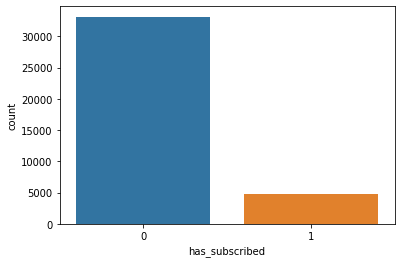

In [449]:
sns.countplot(x= 'has_subscribed', data=df)

Coletando os dados de treino e teste

In [450]:
x = df.drop('has_subscribed', axis= 1)
y = df['has_subscribed']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, shuffle=True)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


Declarando a variável para KNN

In [451]:
knn = KNeighborsClassifier(n_neighbors=3)

Aplicando KNN nos dados

In [452]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_proba = knn.predict_proba(x_test)[:,1]

Resultados do modelo

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9016    0.9485    0.9244      8286
           1     0.4426    0.2832    0.3454      1197

    accuracy                         0.8645      9483
   macro avg     0.6721    0.6158    0.6349      9483
weighted avg     0.8436    0.8645    0.8513      9483

Acurácia: 0.8645

AUC: 0.6158



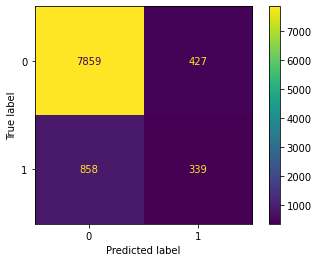

In [453]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_test, y_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))


Podemos visualizar uma alta taxa de FP, além de uma acurácia não tão desejada, faremos o balanceamento dos dados, tanto utilizando undersampling quanto utilizando oversampling para visualizar qual obtém resultados mais desejáveis

Declarando as variáveis para undersampling e oversampling

In [454]:
under_sampler = RandomUnderSampler(random_state=32)
over_sampler = RandomOverSampler(random_state=32)

Aplicando undersampling nos dados de treino

1    3590
0    3590
Name: has_subscribed, dtype: int64


<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

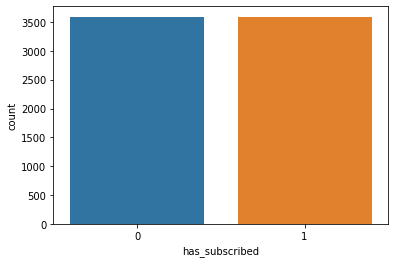

In [455]:
y_int = y.astype(int)
x_rus, y_rus = under_sampler.fit_resample(x, y_int)
x_rus_train, x_rus_test, y_rus_train, y_rus_test = train_test_split(x_rus, y_rus, stratify=y_rus, shuffle=True)
print(pd.Series(y_rus_train).value_counts())
sns.countplot(x=y_rus_train)

Aplicação do algoritmo KNN nos dados de treino, e predição dos dados de teste, balanceados com undersampling

In [456]:
knn.fit(x_rus_train, y_rus_train)
y_rus_pred = knn.predict(x_rus_test)
y_rus_proba = knn.predict_proba(x_rus_test)[:,1]

Resultados do modelo balanceado com undersampling

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.7215    0.7402    0.7307      1197
           1     0.7333    0.7143    0.7237      1197

    accuracy                         0.7272      2394
   macro avg     0.7274    0.7272    0.7272      2394
weighted avg     0.7274    0.7272    0.7272      2394

Acurácia: 0.7272

AUC: 0.7708



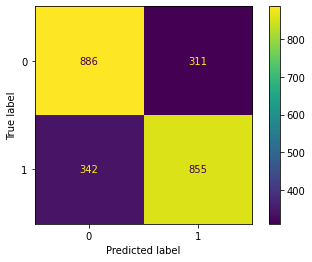

In [457]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_rus_test, y_rus_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_rus_test, y_rus_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_rus_test, y_rus_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_rus_test, y_rus_proba)))


Analisando os resultados vemos um balanceamento na matriz de confusão, porém com uma taxa baixa de acertos em ambos os lados

Agora utilizaremos balancearemos os dados utilizando Oversampling

0    24858
1    24858
Name: has_subscribed, dtype: int64


<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

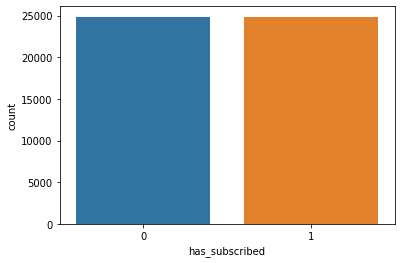

In [484]:
x_ros, y_ros = over_sampler.fit_resample(x, y_int)
x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, stratify=y_ros, shuffle=True)
print(pd.Series(y_ros_train).value_counts())
sns.countplot(x=y_ros_train)

Aplicação do algoritmo KNN nos dados de treino, e predição dos dados de teste, balanceados com Oversampling

In [485]:
knn.fit(x_ros_train, y_ros_train)
y_ros_pred = knn.predict(x_ros_test)
y_ros_proba = knn.predict_proba(x_ros_test)[:,1]

Resultados do modelo balanceado com Oversampling

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9874    0.8115    0.8908      8286
           1     0.8400    0.9896    0.9087      8286

    accuracy                         0.9006     16572
   macro avg     0.9137    0.9006    0.8998     16572
weighted avg     0.9137    0.9006    0.8998     16572

Acurácia: 0.9006

AUC: 0.9414



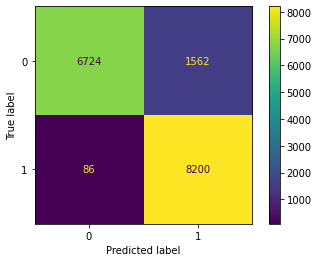

In [486]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ros_test, y_ros_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_ros_test, y_ros_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_ros_test, y_ros_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_ros_test, y_ros_proba)))


Analisando os resultados podemos verificar uma alta taxa de acertos da classe positiva, porém uma baixa taxa de acertos da classe negativa

Utilização do GridSearchCV para definir os melhores parâmetros para o modelo, afim de otimizar a perfomance

In [488]:
#List Hyperparameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Making model
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(x_ros_train, y_ros_train)
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
y_ros_pred = best_model.predict(x_ros_test)
#Check performance using accuracy
y_ros_proba = best_model.predict_proba(x_ros_test)[:,1]

Best leaf_size: 3
Best p: 2
Best n_neighbors: 1


Resultados do modelo otimizado

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9958    0.8917    0.9409      8286
           1     0.9020    0.9963    0.9468      8286

    accuracy                         0.9440     16572
   macro avg     0.9489    0.9440    0.9438     16572
weighted avg     0.9489    0.9440    0.9438     16572

Acurácia: 0.9440

AUC: 0.9440



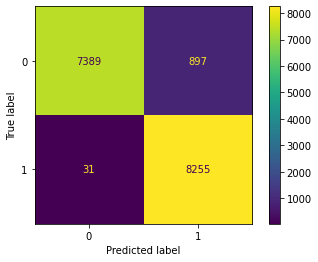

In [491]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ros_test, y_ros_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_ros_test, y_ros_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_ros_test, y_ros_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_ros_test, y_ros_proba)))


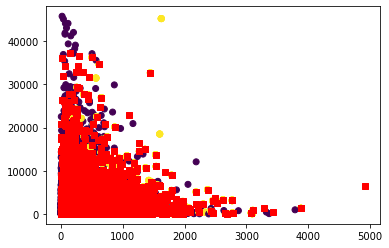

In [387]:
fig, ax = plt.subplots()

ax.scatter(x=x_ros_train.contact_duration, y=x_ros_train.balance, c=y_ros_train, cmap='viridis')
ax.scatter(x=x_ros_test.contact_duration, y=x_ros_test.balance, c='r', marker='s')
plt.show()

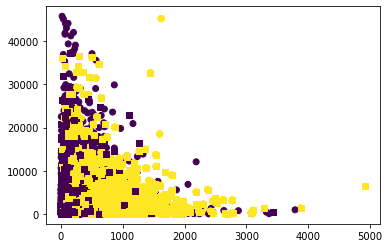

In [388]:
fig, ax = plt.subplots()

ax.scatter(x=x_ros_train.contact_duration, y=x_ros_train.balance, c=y_ros_train, cmap='viridis')
ax.scatter(x=x_ros_test.contact_duration, y=x_ros_test.balance, c=y_ros_pred, marker='s')
plt.show()

In [432]:
accuracy = str(round(knn.score(x,y) * 100, 2))+"%"
print("A acurácia do modelo k-NN undersampled foi",accuracy)

A acurácia do modelo k-NN undersampled foi 88.2%


In [433]:
ros = RandomOverSampler(random_state=32)
smote = SMOTE(random_state=32)
x = df_train[['contact_duration', 'outcome_of_previous_campaign', 'last_contact_of_previous_campaign', 'balance']]
y = df_train.has_subscribed
y=y.astype('int')
knn = KNeighborsClassifier(n_neighbors=3)
x, y = ros.fit_resample(x, y)
x, y = smote.fit_resample(x,y)
knn.fit(x, y)
# print(knn.predict_proba([[1, 5000, 29]]))

x_test = df_test[['contact_duration', 'outcome_of_previous_campaign', 'last_contact_of_previous_campaign', 'balance']]
y_test = df_test.has_subscribed
y_test = y_test.astype(int)
x_test, y_test = ros.fit_resample(x_test, y_test)
x_test, y_test = smote.fit_resample(x_test, y_test)
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [434]:
y_test = pd.array(y_test, dtype='float64')

In [570]:
df

,balance,contact_duration,last_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,2143.0,261.0,0.0,3,0
1,29.0,151.0,0.0,3,0
2,2.0,76.0,0.0,3,0
3,1506.0,92.0,0.0,3,0
4,1.0,198.0,0.0,3,0
...,...,...,...,...,...
45206,825.0,977.0,0.0,3,1
45207,1729.0,456.0,0.0,3,1
45208,5715.0,1127.0,184.0,1,1
45209,668.0,508.0,0.0,3,0


In [571]:
x_train

,balance,contact_duration,last_contact_of_previous_campaign,outcome_of_previous_campaign
4726,1831.0,203.0,0.0,3
17422,2683.0,73.0,0.0,3
36779,-118.0,230.0,0.0,3
2810,1130.0,138.0,0.0,3
32648,3975.0,515.0,150.0,2
...,...,...,...,...
36902,947.0,361.0,0.0,3
14403,0.0,111.0,0.0,3
29870,739.0,605.0,0.0,3
28058,358.0,156.0,0.0,3


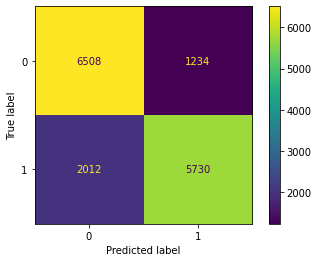

In [436]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

In [437]:
accuracy = str(round(knn.score(x,y) * 100, 2))+"%"
print("A acurácia do modelo k-NN oversampled foi",accuracy)

A acurácia do modelo k-NN oversampled foi 94.36%


In [451]:
ros = RandomOverSampler(random_state=32)
smote = SMOTE(random_state=32)
x = df[['contact_duration', 'outcome_of_previous_campaign', 'last_contact_of_previous_campaign', 'balance']]
y = df.has_subscribed
y=y.astype('int')

x, y = ros.fit_resample(x, y)
x, y = smote.fit_resample(x, y)


In [454]:
x_train = x[23953:]
y_train = y[23953:]

x_test = x[:23953]
y_test = y[:23953]
y_test = pd.array(y_test, dtype='float64')

In [455]:
x_test

,contact_duration,outcome_of_previous_campaign,last_contact_of_previous_campaign,balance
0,261.0,3.0,0.0,2143.0
1,151.0,3.0,0.0,29.0
2,76.0,3.0,0.0,2.0
3,92.0,3.0,0.0,1506.0
4,198.0,3.0,0.0,1.0
...,...,...,...,...
23948,64.0,3.0,0.0,370.0
23949,131.0,3.0,0.0,258.0
23950,511.0,3.0,0.0,1255.0
23951,82.0,3.0,0.0,148.0


In [456]:
y_test

<PandasArray>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 ...
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Length: 23953, dtype: float64

In [457]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

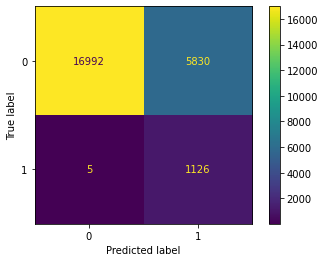

In [458]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

In [459]:
accuracy = str(round(knn.score(x,y) * 100, 2))+"%"
print("A acurácia do modelo k-NN foi",accuracy)

A acurácia do modelo k-NN foi 88.75%
